In [1]:
#Import libraries 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from skimage.io import imread
from skimage.segmentation import mark_boundaries
from skimage.util import montage
from skimage.morphology import label 
'''for the memory management'''
import gc
gc.enable()

In [2]:
#Train and Test directories
train_image_dir="C:\\Users\\hp\\Desktop\\airbus-ship-detection\\train_v2"
test_image_dir="C:\\Users\\hp\\Desktop\\airbus-ship-detection\\test_v2"

In [3]:
#Getting into train directory
train_images=os.listdir(train_image_dir)
train_images.sort()
print(f'Total of {len(train_images)} image in train directory.\nthe 1st five train images looks like:{train_images[:5]}')

Total of 192556 image in train directory.
the 1st five train images looks like:['00003e153.jpg', '0001124c7.jpg', '000155de5.jpg', '000194a2d.jpg', '0001b1832.jpg']


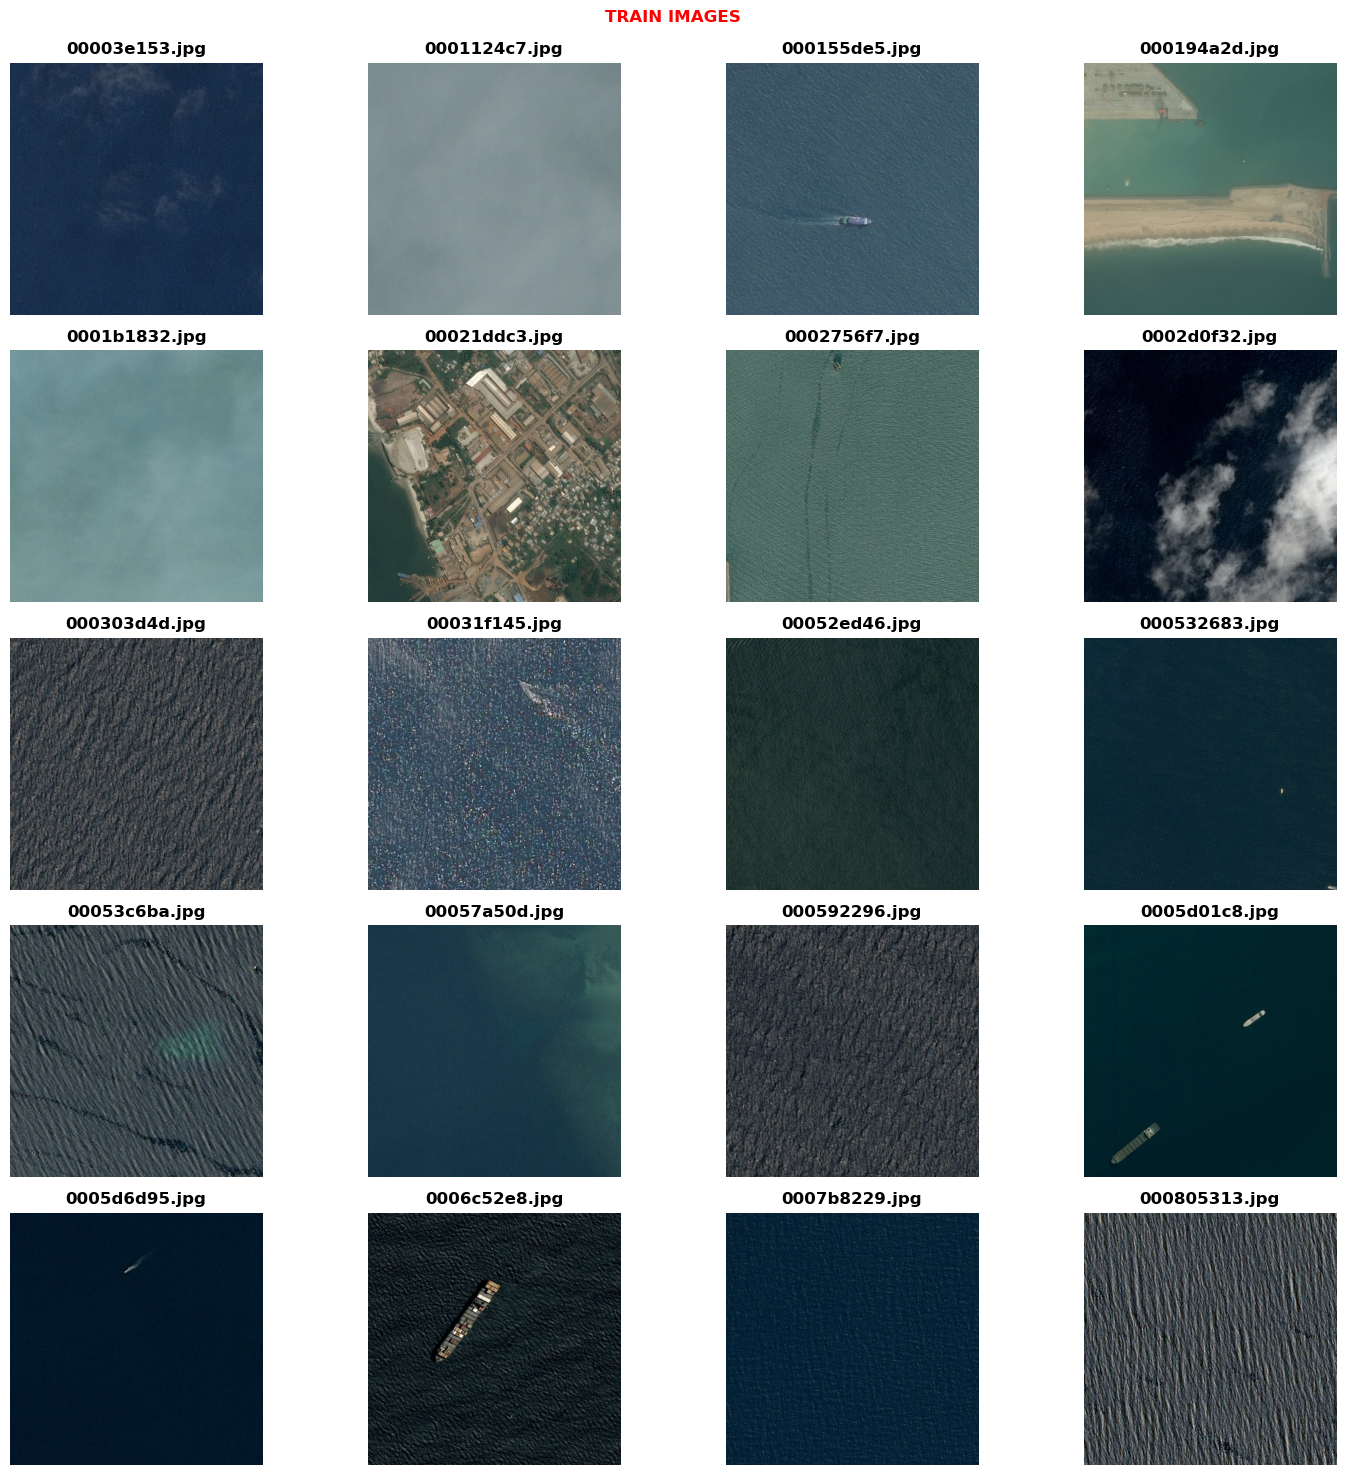

In [4]:
#Using for loop to gendrate different images to understand how data looks like
plt.figure(figsize=(15,15))
plt.suptitle('TRAIN IMAGES\n', weight = 'bold', fontsize = 12, color = 'r')
for i in range(20): 
    plt.subplot(5, 4, i+1)
    plt.imshow(imread(train_image_dir + "/" + train_images[i]))
    plt.title(f"{train_images[i]}", weight = 'bold')
    plt.axis('off')
plt.tight_layout()

In [5]:
#Train ships segmented masks
masks=pd.read_csv("C:\\Users\\hp\\Desktop\\airbus-ship-detection\\train_ship_segmentations_v2.csv")
masks.head(10)

ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  0001124c7.jpg                                                NaN
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...
5  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...
6  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...
7  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...
8  0001b1832.jpg                                                NaN
9  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...

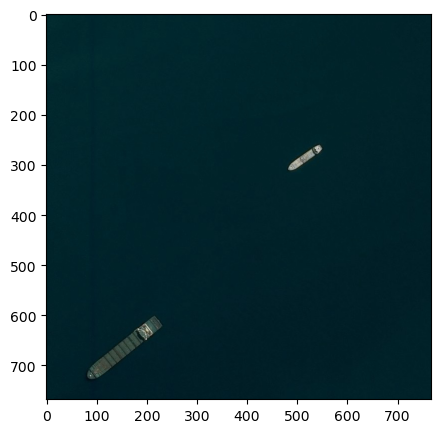

In [6]:
#Let us now see how it works for Image id: '0005d01c8.jpg' we have in the mask data frame

#Original image from training set
img_arr = imread(train_image_dir +'/'+"0005d01c8.jpg")
plt.figure(figsize=(5,5))
plt.imshow(img_arr)
plt.show()


In [7]:
#print the shape of the img
img_arr.shape

(768, 768, 3)

In [8]:
#Filter out all 0005d01c8.jpg image ids and respective encoded data
#2 ships means 2 same image ids will be there!
rle_0 = masks.query("ImageId=='0005d01c8.jpg'")['EncodedPixels']
rle_0

29    56010 1 56777 3 57544 6 58312 7 59079 9 59846 ...
30    365871 1 366638 3 367405 6 368173 7 368940 9 3...
Name: EncodedPixels, dtype: object

In [9]:
#Make a list of each mask shown above also visualise whats happening!
mask_lst , ct = [] , 1
for mask in rle_0:
    print(f'Mask {ct}: \n{mask}\n\n')
    mask_lst.append(mask)
    ct+=1

Mask 1: 
56010 1 56777 3 57544 6 58312 7 59079 9 59846 11 60613 14 61380 16 62148 17 62915 19 63682 22 64449 24 65216 26 65984 27 66751 30 67518 32 68285 34 69052 36 69820 38 70587 40 71354 42 72121 42 72888 42 73656 42 74423 42 75190 42 75957 42 76724 42 77492 42 78259 42 79026 42 79793 42 80560 42 81328 42 82095 42 82862 42 83629 42 84396 42 85164 42 85931 42 86698 42 87465 42 88232 42 89000 42 89767 42 90534 42 91301 42 92068 42 92836 42 93603 42 94370 42 95137 42 95904 42 96672 42 97439 42 98206 42 98973 42 99740 42 100508 42 101275 42 102042 42 102809 42 103576 42 104344 42 105111 42 105878 42 106645 42 107412 42 108180 42 108947 42 109714 42 110481 42 111249 41 112016 42 112783 42 113550 42 114317 42 115085 41 115852 42 116619 42 117386 42 118153 42 118921 41 119688 42 120455 42 121222 42 121989 42 122757 41 123524 42 124291 42 125058 42 125825 42 126593 42 127360 42 128127 42 128894 42 129661 42 130429 42 131196 42 131963 42 132730 42 133497 42 134265 42 135032 42 135799 42 1365

In [10]:
#Split and Display how the first mask in the list looks like
split=mask_lst[0].split()
print(split)

['56010', '1', '56777', '3', '57544', '6', '58312', '7', '59079', '9', '59846', '11', '60613', '14', '61380', '16', '62148', '17', '62915', '19', '63682', '22', '64449', '24', '65216', '26', '65984', '27', '66751', '30', '67518', '32', '68285', '34', '69052', '36', '69820', '38', '70587', '40', '71354', '42', '72121', '42', '72888', '42', '73656', '42', '74423', '42', '75190', '42', '75957', '42', '76724', '42', '77492', '42', '78259', '42', '79026', '42', '79793', '42', '80560', '42', '81328', '42', '82095', '42', '82862', '42', '83629', '42', '84396', '42', '85164', '42', '85931', '42', '86698', '42', '87465', '42', '88232', '42', '89000', '42', '89767', '42', '90534', '42', '91301', '42', '92068', '42', '92836', '42', '93603', '42', '94370', '42', '95137', '42', '95904', '42', '96672', '42', '97439', '42', '98206', '42', '98973', '42', '99740', '42', '100508', '42', '101275', '42', '102042', '42', '102809', '42', '103576', '42', '104344', '42', '105111', '42', '105878', '42', '10664

In [11]:
#Grab all the starting pixels and lenghts and convert it into integers using numpy
starts, lengths=[np.array(x,dtype=int) for x in (split[::2],split[1::2])]
starts, lengths

(array([ 56010,  56777,  57544,  58312,  59079,  59846,  60613,  61380,
         62148,  62915,  63682,  64449,  65216,  65984,  66751,  67518,
         68285,  69052,  69820,  70587,  71354,  72121,  72888,  73656,
         74423,  75190,  75957,  76724,  77492,  78259,  79026,  79793,
         80560,  81328,  82095,  82862,  83629,  84396,  85164,  85931,
         86698,  87465,  88232,  89000,  89767,  90534,  91301,  92068,
         92836,  93603,  94370,  95137,  95904,  96672,  97439,  98206,
         98973,  99740, 100508, 101275, 102042, 102809, 103576, 104344,
        105111, 105878, 106645, 107412, 108180, 108947, 109714, 110481,
        111249, 112016, 112783, 113550, 114317, 115085, 115852, 116619,
        117386, 118153, 118921, 119688, 120455, 121222, 121989, 122757,
        123524, 124291, 125058, 125825, 126593, 127360, 128127, 128894,
        129661, 130429, 131196, 131963, 132730, 133497, 134265, 135032,
        135799, 136566, 137333, 138101, 138868, 139635, 140402, 

In [12]:
# Get the ending pixels.
'''Examples :
56010  1 ---> Starts at 56010 and ends at 56010
56777  3 ---> Starts at 56777 and ends at 56779
57544  6 ---> Starts at 57544 and ends at 57549'''
ends =starts + lengths-1
pd.DataFrame({
    'Starts' : starts,
    'Lengths' : lengths,
    'Ends' : ends
}).head(10)

Starts  Lengths   Ends
0   56010        1  56010
1   56777        3  56779
2   57544        6  57549
3   58312        7  58318
4   59079        9  59087
5   59846       11  59856
6   60613       14  60626
7   61380       16  61395
8   62148       17  62164
9   62915       19  62933

In [13]:
#Create 1s in place of these pixels and rest should be 0
img = np.zeros(768*768, dtype = np.uint8)
for start, end in zip(starts, ends):
    img[start:end+1]=1

In [14]:
#Check how output looks
img[56776:56781] # Should output 0, 1, 1, 1 ,0 as we know 56777, 56778, 56779 ---> 1 and 5676, 56780 ---> 0

array([0, 1, 1, 1, 0], dtype=uint8)

In [15]:
#Do the same idea for another ship in the image
split_1 = mask_lst[1].split()                                                            #Split the mask into start_pixels and lengths
starts,lengths=[np.array(x,dtype = int) for x in (split_1[::2],split_1[1::2])]   #Generate arrays from only starts and lengths
ends = starts + lengths-1                                                                #Start pixel to end pixel will be start - 1 + length
img1 = np.zeros(768*768, dtype = np.uint8)                                               #1D array containing all zeros
for start, end in zip(starts, ends):                                                     #For each start to end pair
    img1[start:end+1]=1                                                                  #Convert the values from 0 to 1

In [16]:
#Reshaping both the ship masks and combining it to form the final mask!
img = img.reshape(768, 768)
img1 = img1.reshape(768, 768)
final = img+img1
print(final, '\n\n', final.shape, '\n\n' , final.ndim)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

 (768, 768) 

 2


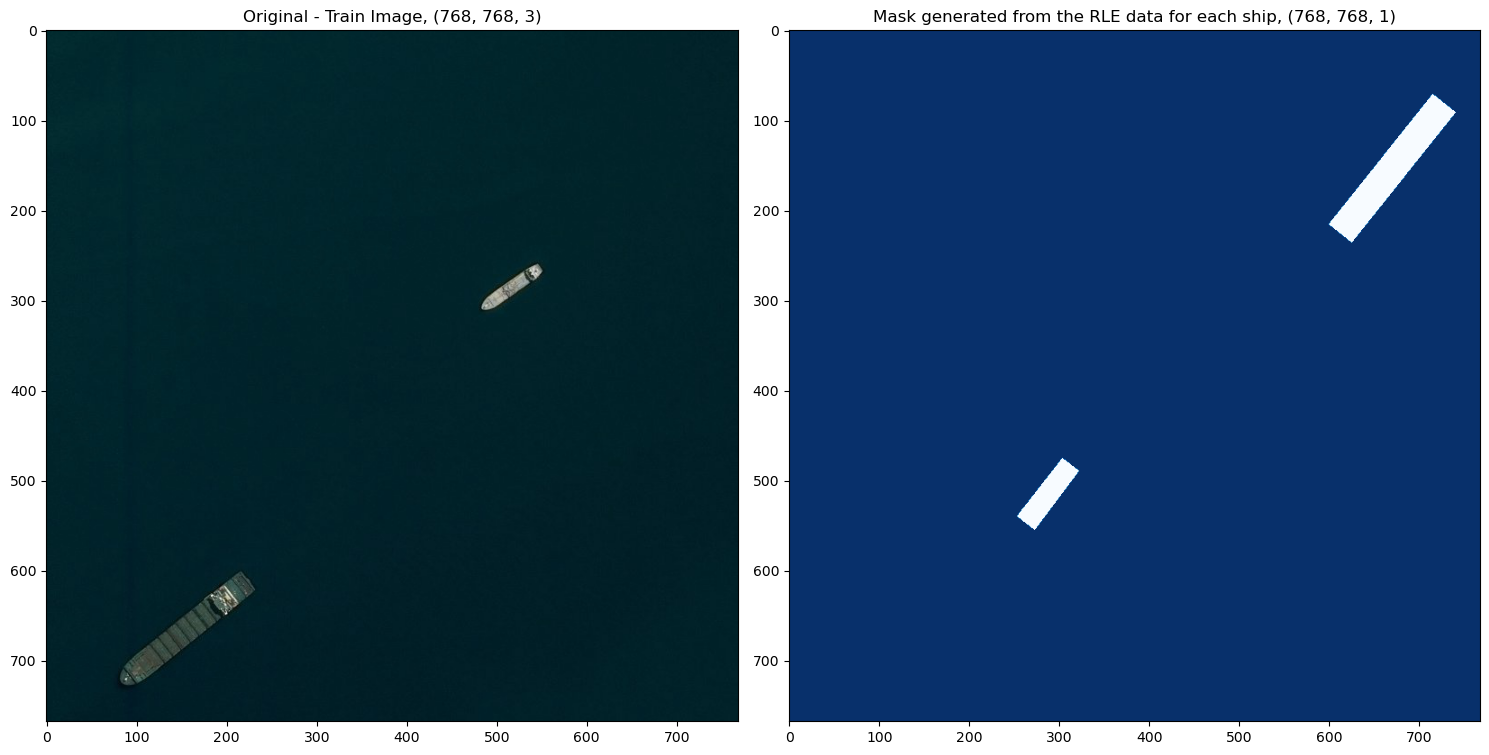

In [17]:
# Expand dimension of this array to have only 1 channel in the mask and visualise original and final mask
final = np.expand_dims(final,-1) #-1 means the last available dimenstion,in this case it is 2.Hence,on axis=2 we will get 1.
original = imread(train_image_dir+'/'+train_images[15])
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(f"Original - Train Image, {original.shape}")
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.title(f"Mask generated from the RLE data for each ship, {final.shape}")
plt.imshow(final, cmap = "Blues_r")
plt.tight_layout()
plt.show()

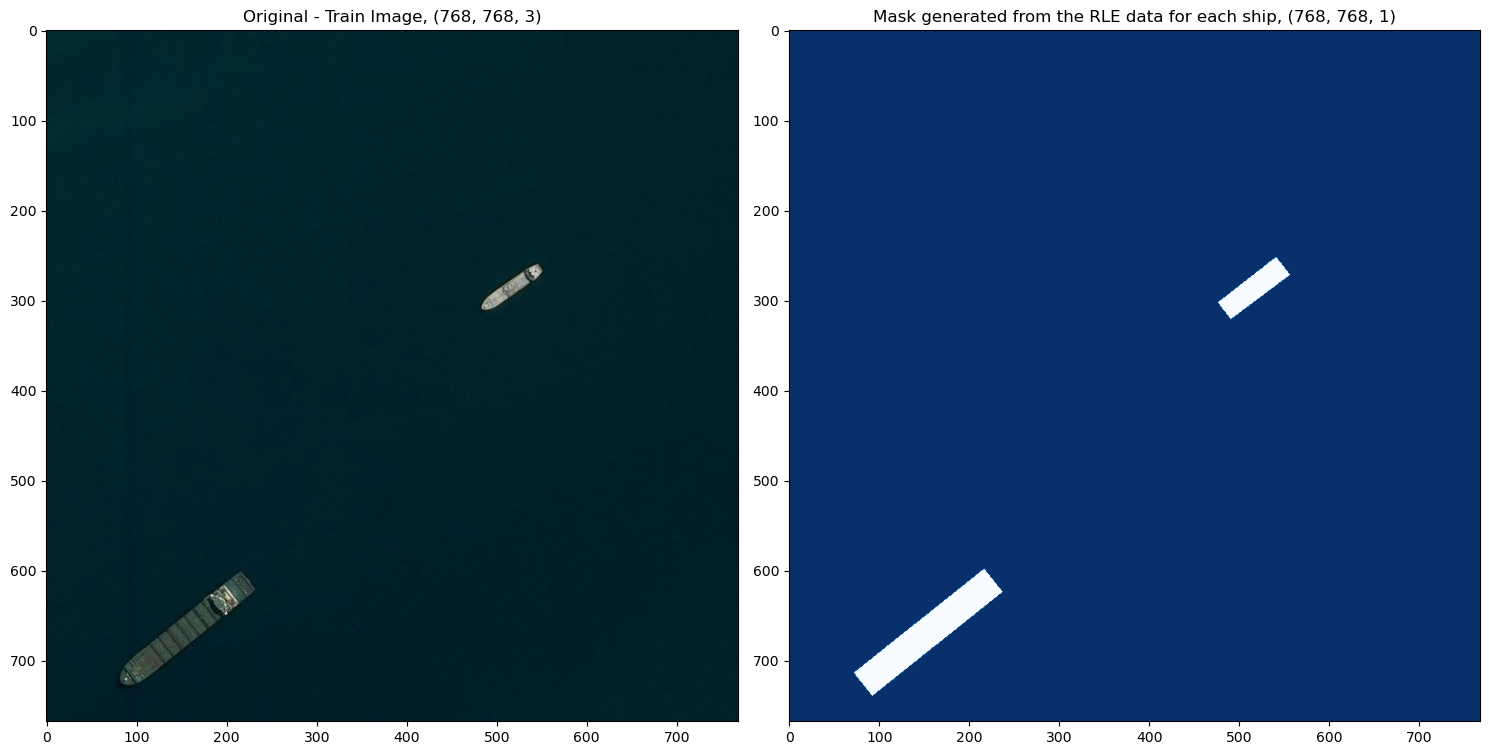

In [18]:
# Copy Paste the code from the prev cell with one change - Transpose!
img=img.reshape(768, 768).T        #Transpose the first ship mask
img1 =img1.reshape(768, 768).T     #Transpose the second ship mask
final= img+img1                    # Generate the final mask with two ships
final = np.expand_dims(final, -1)
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(f"Original - Train Image, {original.shape}")
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.title(f"Mask generated from the RLE data for each ship, {final.shape}")
plt.imshow(final, cmap = "Blues_r")
plt.tight_layout()
plt.show()


In [19]:
#Define functions to do these tasks for all the training images
def rle_decode(mask_rle, shape=(768,768)):
    '''
    Input arguments:-
    mask_rle: Mask of one ship in the train image
    shape: Output shape of the image array
    '''
    s=mask_rle.split()                                                                   #Split the mask of each ship that is in RLE format
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]               #Get the start pixels and lengths for which image has ship
    ends = starts + lengths-1                                                            #Get the end pixels where we need to stop
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)                                    #A 1D vec full of zeros of size = 768*768
    for lo, hi in zip(starts, ends):                                                     #For each start to end pixels where ship exists
        img[lo:hi+1]=1                                                                   # Fill those values with 1 in the main 1D vector
    '''
    Returns -
    Transposed array of the mask: Contains 1s and 0s. 1 for ship and 0 for background
    '''
    return img.reshape(shape).T

def masks_as_image(in_mask_list):
    '''
    Input
    in_mask_list: List of the masks of each ship in one whole training image
    '''
    all_masks = np.zeros((768, 768), dtype = np.int16)                                    # Creating 0s for the background
    for mask in in_mask_list:                                                             #For each ship rle data in the list of mask rle
        if isinstance(mask, str):                                                         #If the datatype is string
            all_masks += rle_decode(mask)                                                 # Use rle_decode to create one mask for whole image
    '''
    Returns -
    Full mask of the training image whose RLE data has been passed as an input
    '''
    return np.expand_dims(all_masks, -1)

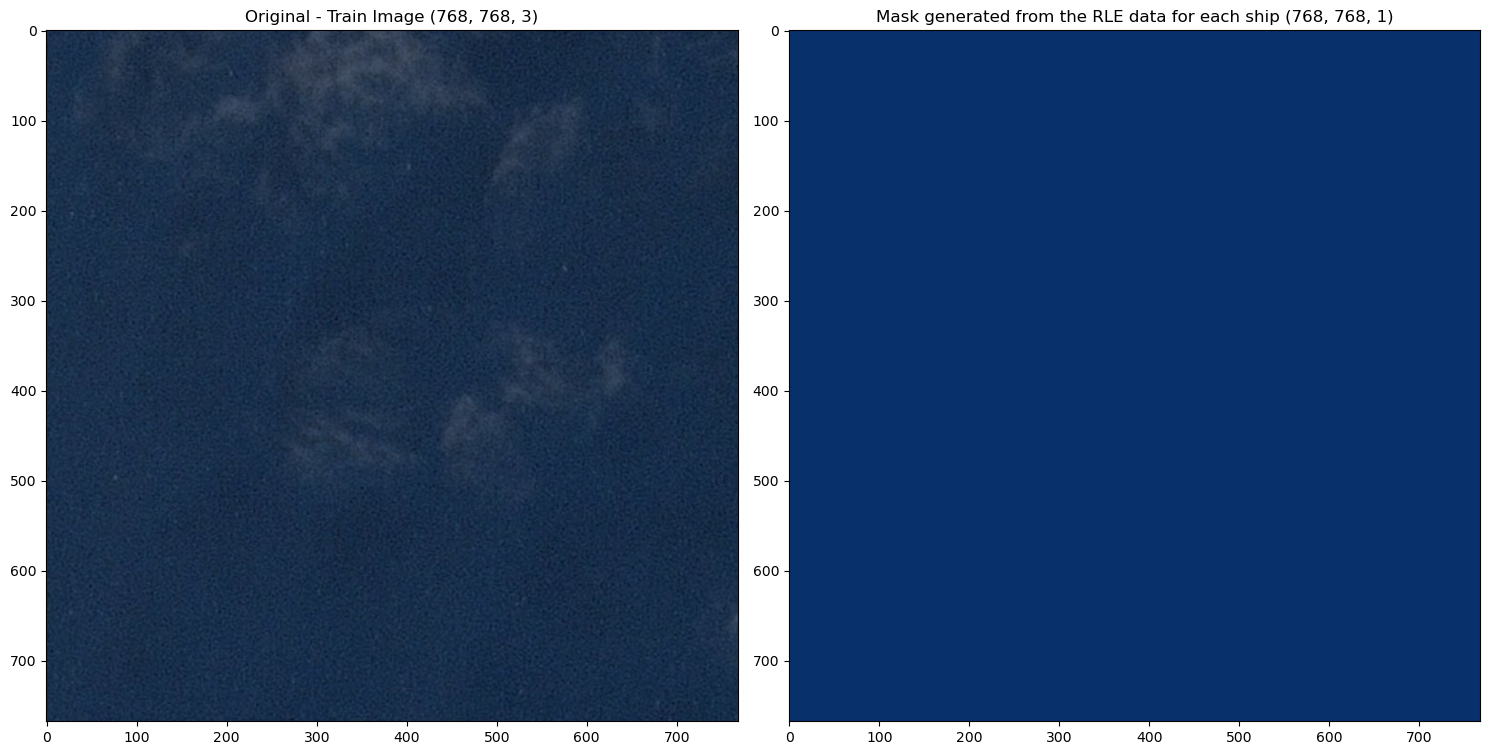

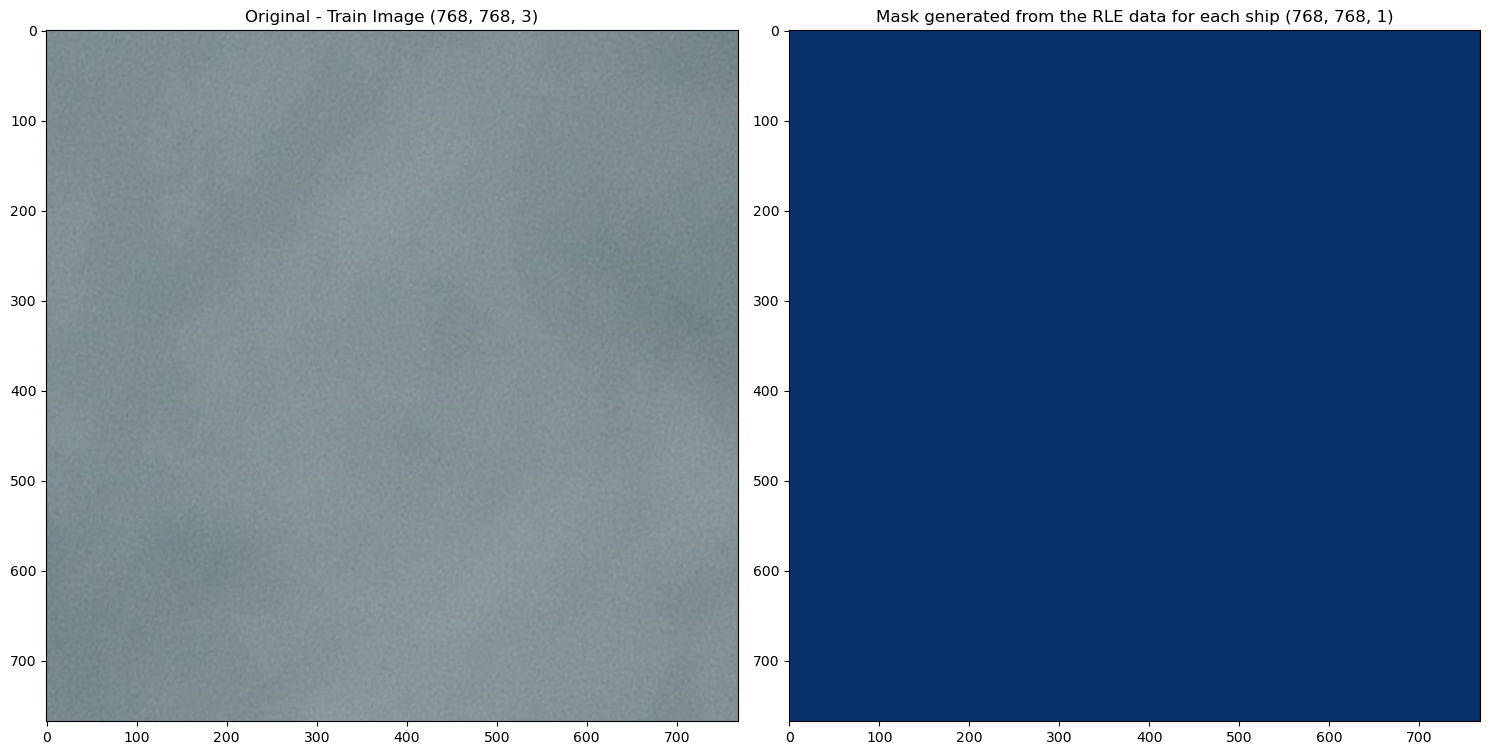

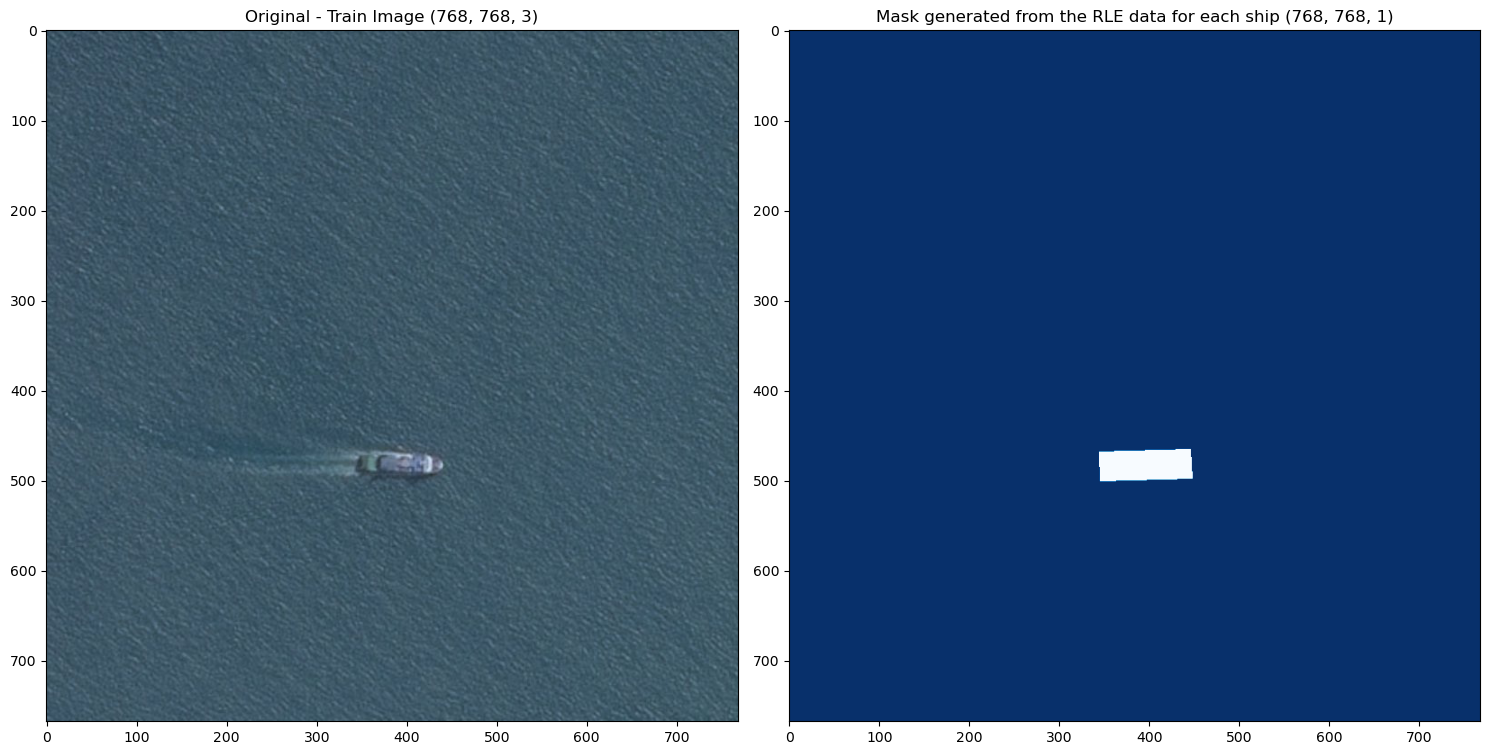

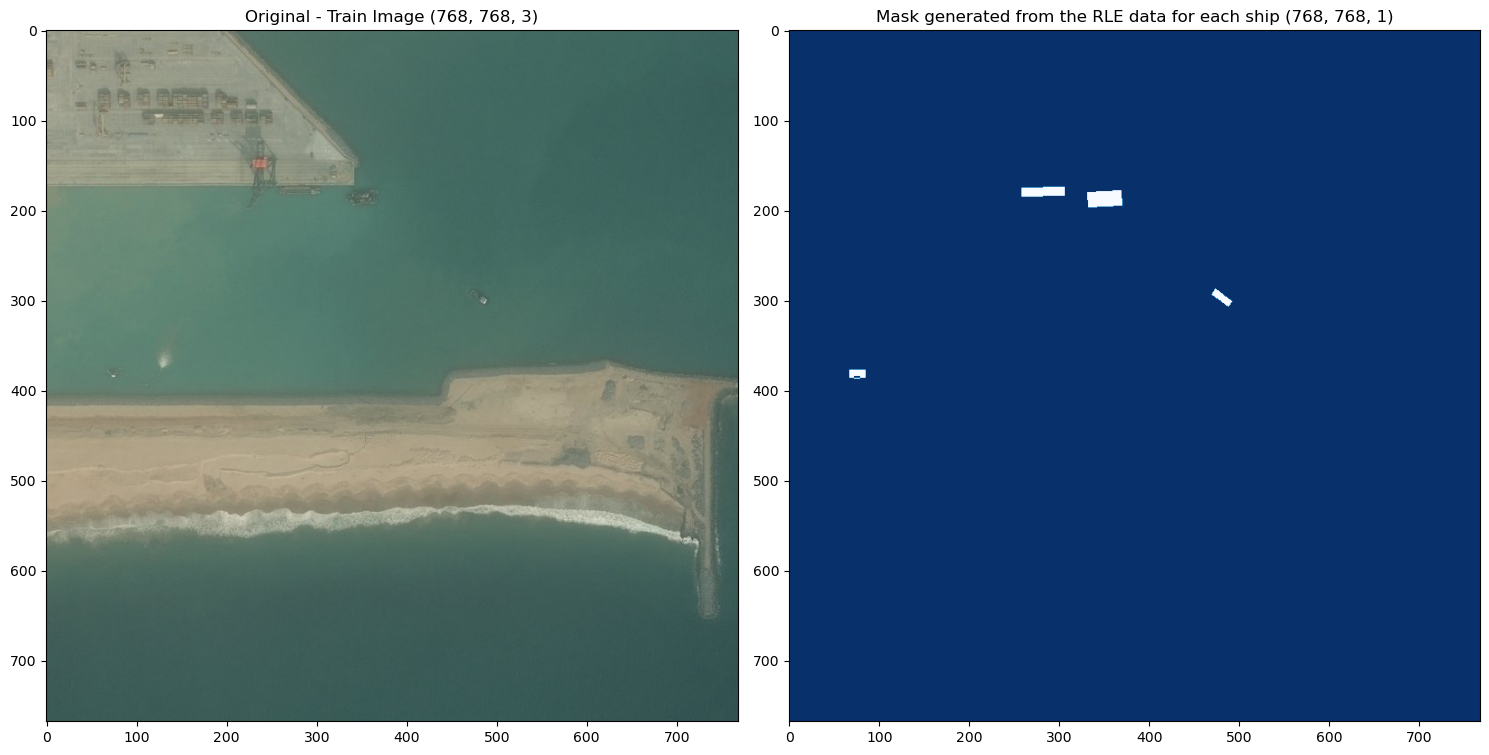

In [20]:
for num in [1, 2, 3, 4]:
    rle_0 = masks.query(f'ImageId=="{train_images[num-1]}"')['EncodedPixels']
    img_0 = masks_as_image(rle_0)
    original = imread(train_image_dir+"/"+train_images[num-1])
#     img = Image.fromarray(img_0)
#     img.save("")
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    plt.title(f"Original - Train Image {original.shape}")
    plt.imshow(original)
    plt.subplot(1, 2, 2)
    plt.title(f"Mask generated from the RLE data for each ship {final.shape}")
    plt.imshow(img_0, cmap = "Blues_r")
    plt.tight_layout()
    plt.show()

In [21]:
'''Note that NaN values in the EncodedPixels are of float type and everything else is a string type'''
#Add пеw feature to the masks data frame named as ship.
#If Encoded pixel in anу row is a string. there is a ship else there isn't.
masks['ships']=masks["EncodedPixels"].map(lambda c_row: 1 if isinstance(c_row,str) else 0)
masks.head(9)

ImageId                                      EncodedPixels  ships
0  00003e153.jpg                                                NaN      0
1  0001124c7.jpg                                                NaN      0
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...      1
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...      1
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...      1
5  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...      1
6  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...      1
7  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...      1
8  0001b1832.jpg                                                NaN      0

In [22]:
#Making a new data frame with unique image ids where we are summing up the ship counts
unique_img_ids =masks.groupby("ImageId").agg({'ships': 'sum'}).reset_index()
unique_img_ids.index+=1 # Incrimenting all the index by 1
unique_img_ids.head()

ImageId  ships
1  00003e153.jpg      0
2  0001124c7.jpg      0
3  000155de5.jpg      1
4  000194a2d.jpg      5
5  0001b1832.jpg      0

In [23]:
#Adding a new feature to unique_img_ids data frame. If ship exists in image, val is 1 else 0.
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x>0 else 0.0)
unique_img_ids.head()

ImageId  ships  has_ship
1  00003e153.jpg      0       0.0
2  0001124c7.jpg      0       0.0
3  000155de5.jpg      1       1.0
4  000194a2d.jpg      5       1.0
5  0001b1832.jpg      0       0.0

In [24]:
#Check the size of the files. Will take some time to run as there are loads of files!!!
unique_img_ids['file_size_kb']=unique_img_ids['ImageId'].map(lambda c_img_id: os.stat(os.path.join(train_image_dir,c_img_id)).st_size/1024)
'''os.stat is used to get status of the specified path. Here, st_size represents size of the file in bytes. Converting it into kB!''' 

'os.stat is used to get status of the specified path. Here, st_size represents size of the file in bytes. Converting it into kB!'

In [25]:
#We can get rid of any images whose size is less than 35 Kb. As some of the files are corrupted!
unique_img_ids[unique_img_ids.file_size_kb<35].head()

ImageId  ships  has_ship  file_size_kb
85    001bfb70a.jpg      0       0.0     22.796875
359   0080bd6a5.jpg      0       0.0     14.327148
819   011589d1f.jpg      0       0.0     20.317383
1434  01df54887.jpg      0       0.0     16.492188
2342  0318fc519.jpg      0       0.0     13.289062

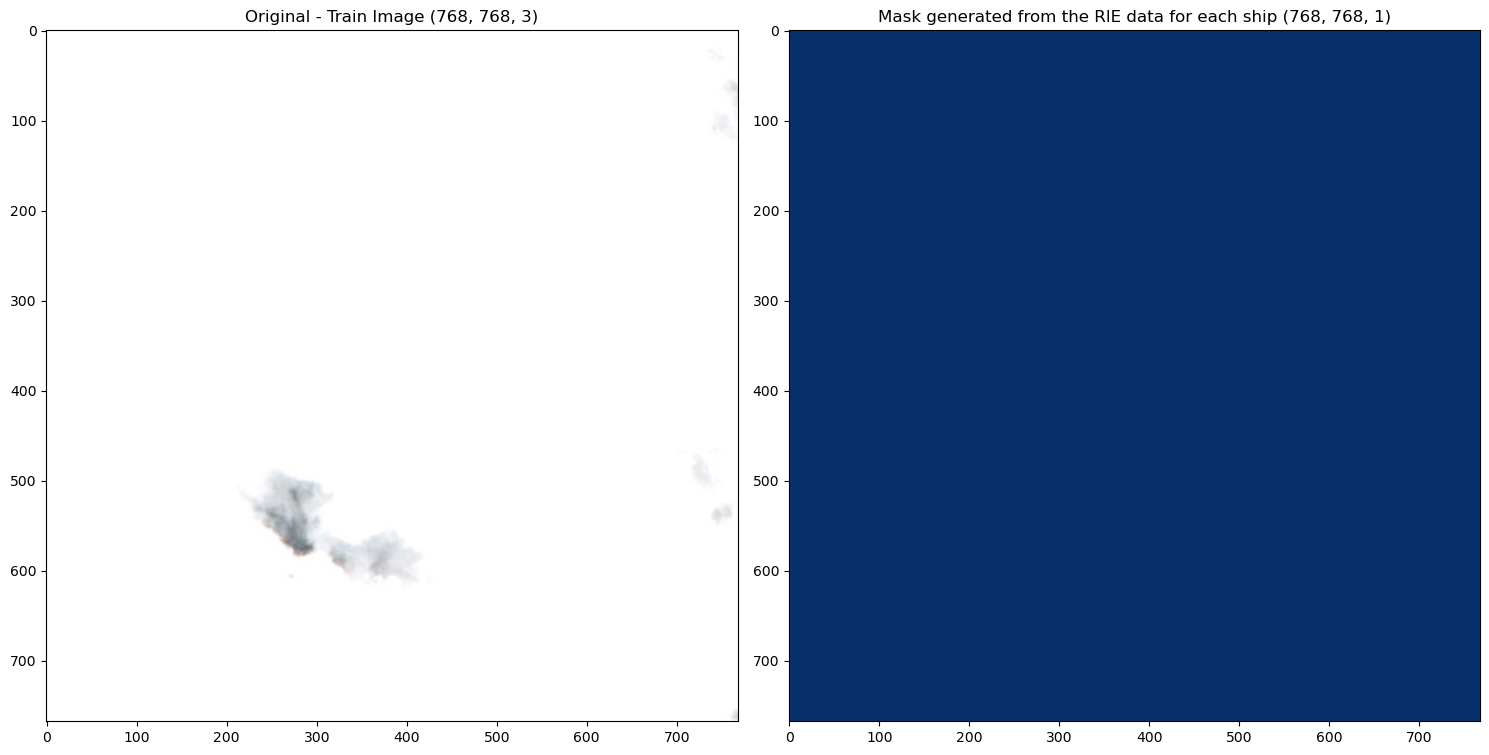

In [26]:
rle_0= masks.query(f'ImageId=="0318fc519.jpg"')['EncodedPixels']
img_0= masks_as_image(rle_0)
original=imread(train_image_dir+"/"+'0318fc519.jpg')
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(f'Original - Train Image {original.shape}')
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.title(f'Mask generated from the RlE data for each ship {final.shape}')
plt.imshow(img_0,cmap="Blues_r")
plt.tight_layout()
plt.show()

In [27]:
#Keep the files whose size > 35 kb
unique_img_ids=unique_img_ids[unique_img_ids.file_size_kb > 35]
unique_img_ids.head()

ImageId  ships  has_ship  file_size_kb
1  00003e153.jpg      0       0.0    128.944336
2  0001124c7.jpg      0       0.0     76.059570
3  000155de5.jpg      1       1.0    147.625977
4  000194a2d.jpg      5       1.0     75.221680
5  0001b1832.jpg      0       0.0     95.627930

In [28]:
# Also, retrive the old masks data frame
masks.drop(["ships"], axis=1, inplace=True)
masks.index+=1
masks.head()

ImageId                                      EncodedPixels
1  00003e153.jpg                                                NaN
2  0001124c7.jpg                                                NaN
3  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
4  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...
5  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...

In [29]:
#Train - Test split
from sklearn.model_selection import train_test_split
train_ids, valid_ids =train_test_split(unique_img_ids, test_size=0.3, stratify=unique_img_ids['ships'])

In [30]:
# Create train data frame
train_df = pd.merge(masks, train_ids)

#Create test data frame
valid_df = pd.merge(masks, valid_ids)                                                     

In [31]:
print("There are ~")
print(train_df.shape[0], "training masks.")
print(valid_df.shape[0], "validation masks.")  

There are ~
162047 training masks.
69439 validation masks.


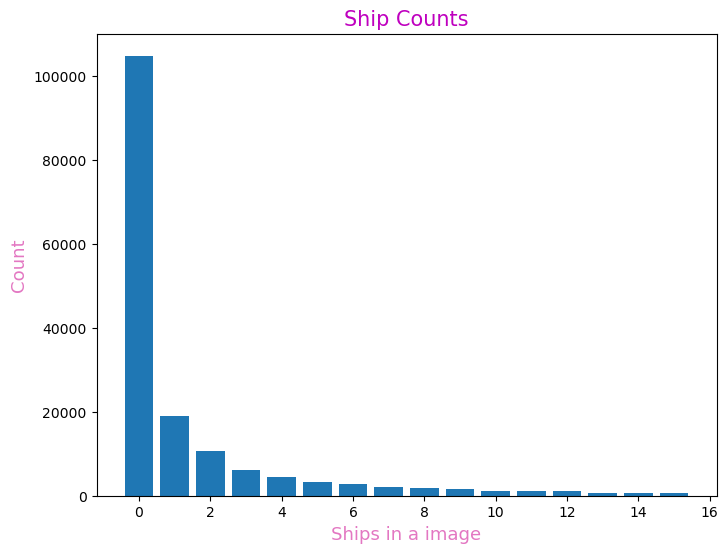

In [32]:
#Visualise the ship counts
plt.figure(figsize=(8,6))
ship_count=train_df['ships'].value_counts()
plt.bar(ship_count.index,ship_count.values)
plt.title("Ship Counts",color='m',fontsize=15)
plt.xlabel("Ships in a image",color='tab:pink',fontsize=13)
plt.ylabel("Count",color='tab:pink',fontsize=13)
plt.show()

In [33]:
#Clipping the max value of grouped_ship_count to be 7, mininum to be 6
train_df['grouped_ship_count']=train_df.ships.map(lambda x: (x+1)//2).clip(0,7)

In [34]:
#Check
train_df.grouped_ship_count.value_counts()

0    104837
1     29713
2     10744
3      5995
4      3772
5      2710
6      2155
7      2121
Name: grouped_ship_count, dtype: int64

In [35]:
#Top 10 data
train_df.head(10)

ImageId                                      EncodedPixels  ships  \
0  00003e153.jpg                                                NaN      0   
1  0001124c7.jpg                                                NaN      0   
2  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...      1   
3  000194a2d.jpg  360486 1 361252 4 362019 5 362785 8 363552 10 ...      5   
4  000194a2d.jpg  51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...      5   
5  000194a2d.jpg  198320 10 199088 10 199856 10 200624 10 201392...      5   
6  000194a2d.jpg  55683 1 56451 1 57219 1 57987 1 58755 1 59523 ...      5   
7  000194a2d.jpg  254389 9 255157 17 255925 17 256693 17 257461 ...      5   
8  0001b1832.jpg                                                NaN      0   
9  00021ddc3.jpg  108287 1 109054 3 109821 4 110588 5 111356 5 1...      9   

   has_ship  file_size_kb  grouped_ship_count  
0       0.0    128.944336                   0  
1       0.0     76.059570                   0  
2       1.0    147.625977                   1  
3       1.0     75.221680                   3  
4       1.0     75.221680                   3  
5       1.0     75.221680                   3  
6       1.0     75.221680                   3  
7       1.0     75.221680                   3  
8       0.0     95.627930                   0  
9       1.0    242.910156                   5

In [36]:
#Random 10 data
train_df.sample(10)

ImageId                                      EncodedPixels  \
37910   3c738d058.jpg                                                NaN   
134958  d56e23865.jpg  325723 20 326491 20 327259 20 328027 20 328795...   
38890   3dec5aa9a.jpg                                                NaN   
132981  d25b862aa.jpg                                                NaN   
43113   444944d20.jpg  179388 3 180156 6 180924 6 181691 6 182459 6 1...   
13746   15d4c328c.jpg                                                NaN   
140491  de29893bd.jpg                                                NaN   
98394   9b23301f2.jpg                                                NaN   
9415    0ed065c04.jpg  485094 1 485861 4 486629 5 487396 7 488165 8 4...   
134190  d42c8bd87.jpg                                                NaN   

        ships  has_ship  file_size_kb  grouped_ship_count  
37910       0       0.0    115.981445                   0  
134958      1       1.0    137.566406                   1  
38890       0       0.0    242.696289                   0  
132981      0       0.0    118.733398                   0  
43113       4       1.0    143.513672                   2  
13746       0       0.0     94.072266                   0  
140491      0       0.0     98.729492                   0  
98394       0       0.0    114.137695                   0  
9415        3       1.0    114.208984                   2  
134190      0       0.0    192.731445                   0

In [37]:
#Random Under-Sampling ships
def sample_ships(in_df, base_rep_val=2000):
    '''
    Input Args:
    in_df - dataframe we want to apply this function
    base_val - random sample of this value to be taken from the data frame
    '''
    if in_df['ships'].values[0]==0:
        return in_df.sample(base_rep_val//3)   #Random 2000//3 = 666 samples taken whose ship count is 0 in an image
    else:
        return in_df.sample(base_rep_val)      #Random 2000 samples taken whose ship count is not 0 in an image

In [38]:
# Creating groups of ship counts and applying the sample_ships functions to randomly undersampie the ships
balanced_train_df = train_df.groupby('grouped_ship_count').apply(sample_ships)
balanced_train_df.grouped_ship_count.value_counts()# In each group we have total of 1500 ships 
#except 0 as we have decreased it even more to 500

1    2000
2    2000
3    2000
4    2000
5    2000
6    2000
7    2000
0     666
Name: grouped_ship_count, dtype: int64

In [39]:
#Explaining what we just did if still not clear
for i in range(8):
    df_val_counts=balanced_train_df[balanced_train_df.grouped_ship_count==i].ships.value_counts()
    print(f"Data frame for grouped ship count = {i} :\n{df_val_counts}\n Sum of Values: {df_val_counts.values.sum()}\n")

Data frame for grouped ship count = 0 :
0    666
Name: ships, dtype: int64
 Sum of Values: 666

Data frame for grouped ship count = 1 :
1    1295
2     705
Name: ships, dtype: int64
 Sum of Values: 2000

Data frame for grouped ship count = 2 :
3    1147
4     853
Name: ships, dtype: int64
 Sum of Values: 2000

Data frame for grouped ship count = 3 :
5    1095
6     905
Name: ships, dtype: int64
 Sum of Values: 2000

Data frame for grouped ship count = 4 :
7    1035
8     965
Name: ships, dtype: int64
 Sum of Values: 2000

Data frame for grouped ship count = 5 :
9     1148
10     852
Name: ships, dtype: int64
 Sum of Values: 2000

Data frame for grouped ship count = 6 :
11    1028
12     972
Name: ships, dtype: int64
 Sum of Values: 2000

Data frame for grouped ship count = 7 :
14    703
15    649
13    648
Name: ships, dtype: int64
 Sum of Values: 2000



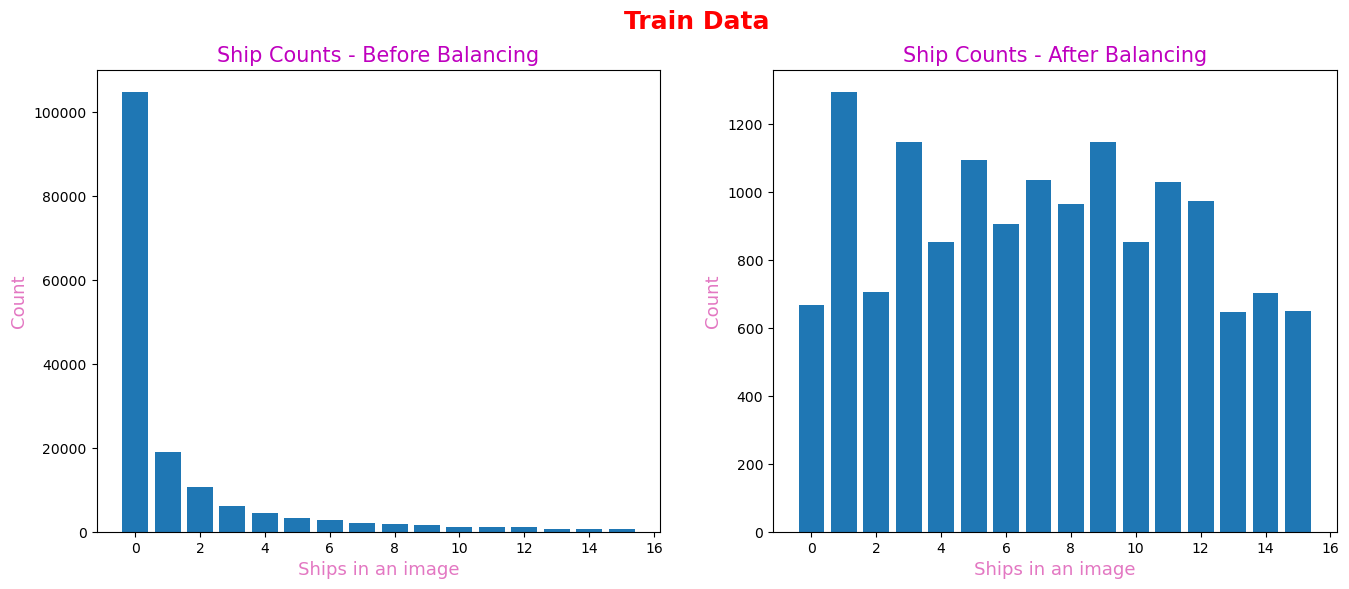

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize = (16, 6))
plt.suptitle("Train Data", fontsize = 18, color = 'r' ,weight = 'bold')
plt.subplot(1, 2, 1)
ship_count=train_df['ships'].value_counts()
plt.bar(ship_count.index,ship_count.values)
plt.title("Ship Counts - Before Balancing", color = 'm', fontsize = 15)
plt.ylabel("Count", color = 'tab:pink', fontsize = 13)
plt.xlabel("Ships in an image", color='tab:pink', fontsize = 13)
plt.subplot(1, 2, 2)
balanced_ship_count=balanced_train_df['ships'].value_counts()
plt.bar(balanced_ship_count.index,balanced_ship_count.values)
plt.title("Ship Counts - After Balancing", color='m', fontsize = 15)
plt.ylabel("Count",color='tab:pink',fontsize=13)
plt.xlabel("Ships in an image",color='tab:pink', fontsize = 13)
plt.show()
plt.tight_layout()

In [41]:
#MODEL PARAMETERS
BATCH_SIZE = 4           #Train batch size
EDGE_CROP = 16           #While building the model
NB_EPOCHS = 100          #Training epochs
GAUSSIAN_NOISE = 0.1     #To be used in a layer in the model
UPSAMPLE_MODE = 'SIMPLE' #SIMPLE==> UpSampling2D, else Conv2DTranspose
NET_SCALING = None       #downsampling inside the network
IMG_SCALING = (1, 1)     #downsampling in preprocessing
VALID_IMG_COUNT = 400    #number of validation images to use
MAX_TRAIN_STEPS = 200    #maximum number of steps_per_epoch in training
#AUGMENT_BRIGHTNESS = False

In [42]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.util import montage
#from skimage.util.montage import montage2d as montage
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
ship_dir = 'C:\\Users\\hp\\Desktop\\airbus-ship-detection'
train_image_dir = os.path.join(ship_dir, 'train_v2')
test_image_dir = os.path.join(ship_dir, 'test_v2')
import gc; gc.enable() # memory is tight

from skimage.morphology import label
def multi_rle_encode(img):
    labels = label(img[:, :, 0])
    return [rle_encode(labels==k) for k in np.unique(labels[labels>0])]

# ref: https://www.kaggle.com/paulorzp/run-length-encode-and-decode
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T  # Needed to align to RLE direction

def masks_as_image(in_mask_list):
    # Take the individual ship masks and create a single mask array for all ships
    all_masks = np.zeros((768, 768), dtype = np.int16)
    #if isinstance(in_mask_list, list):
    for mask in in_mask_list:
        if isinstance(mask, str):
            all_masks += rle_decode(mask)
    return np.expand_dims(all_masks, -1)

In [43]:
def make_image_gen(in_df, batch_size = BATCH_SIZE):
    '''
    Inputs--
    in_df: data frame on which the function will be applied
    batch_size: number of training examples in one iteration
    '''
    all_batches = list(in_df.groupby('ImageId'))
    out_rgb = []
    out_mask = []
    while True:
        np.random.shuffle(all_batches)
        for c_img_id, c_masks in all_batches:
            rgb_path = os.path.join(train_image_dir, c_img_id)
            c_img = imread(rgb_path)
            c_mask = masks_as_image(c_masks['EncodedPixels'].values)
            '''
            if IMG_SCALING is not None:
                c_img = c_img[::IMG_SCALING[0], ::IMG_SCALING[1]]
                c_mask = c_mask[::IMG_SCALING[0], ::IMG_SCALING[1]]
            '''
            out_rgb += [c_img]
            out_mask += [c_mask]
            if len(out_rgb)>=batch_size:
                yield np.stack(out_rgb)/255.0, np.stack(out_mask) #yield np.stack(out_rgb, 0)/255.0,np.stack(out_mask, 0)
                out_rgb, out_mask=[], []

In [44]:
#Generate train data
train_gen = make_image_gen(balanced_train_df)
#Image and Mask
train_x, train_y = next(train_gen)
#print the summary
print(f'train_x :\n Shape={train_x.shape}, Min value={train_x.min()}, Max value={train_x.max()}')
print(f'train_y :\n Shape={train_y.shape}, Min value={train_y.min()}, Max value={train_y.max()}')

train_x :
 Shape=(4, 768, 768, 3), Min value=0.0, Max value=1.0
train_y :
 Shape=(4, 768, 768, 1), Min value=0, Max value=1


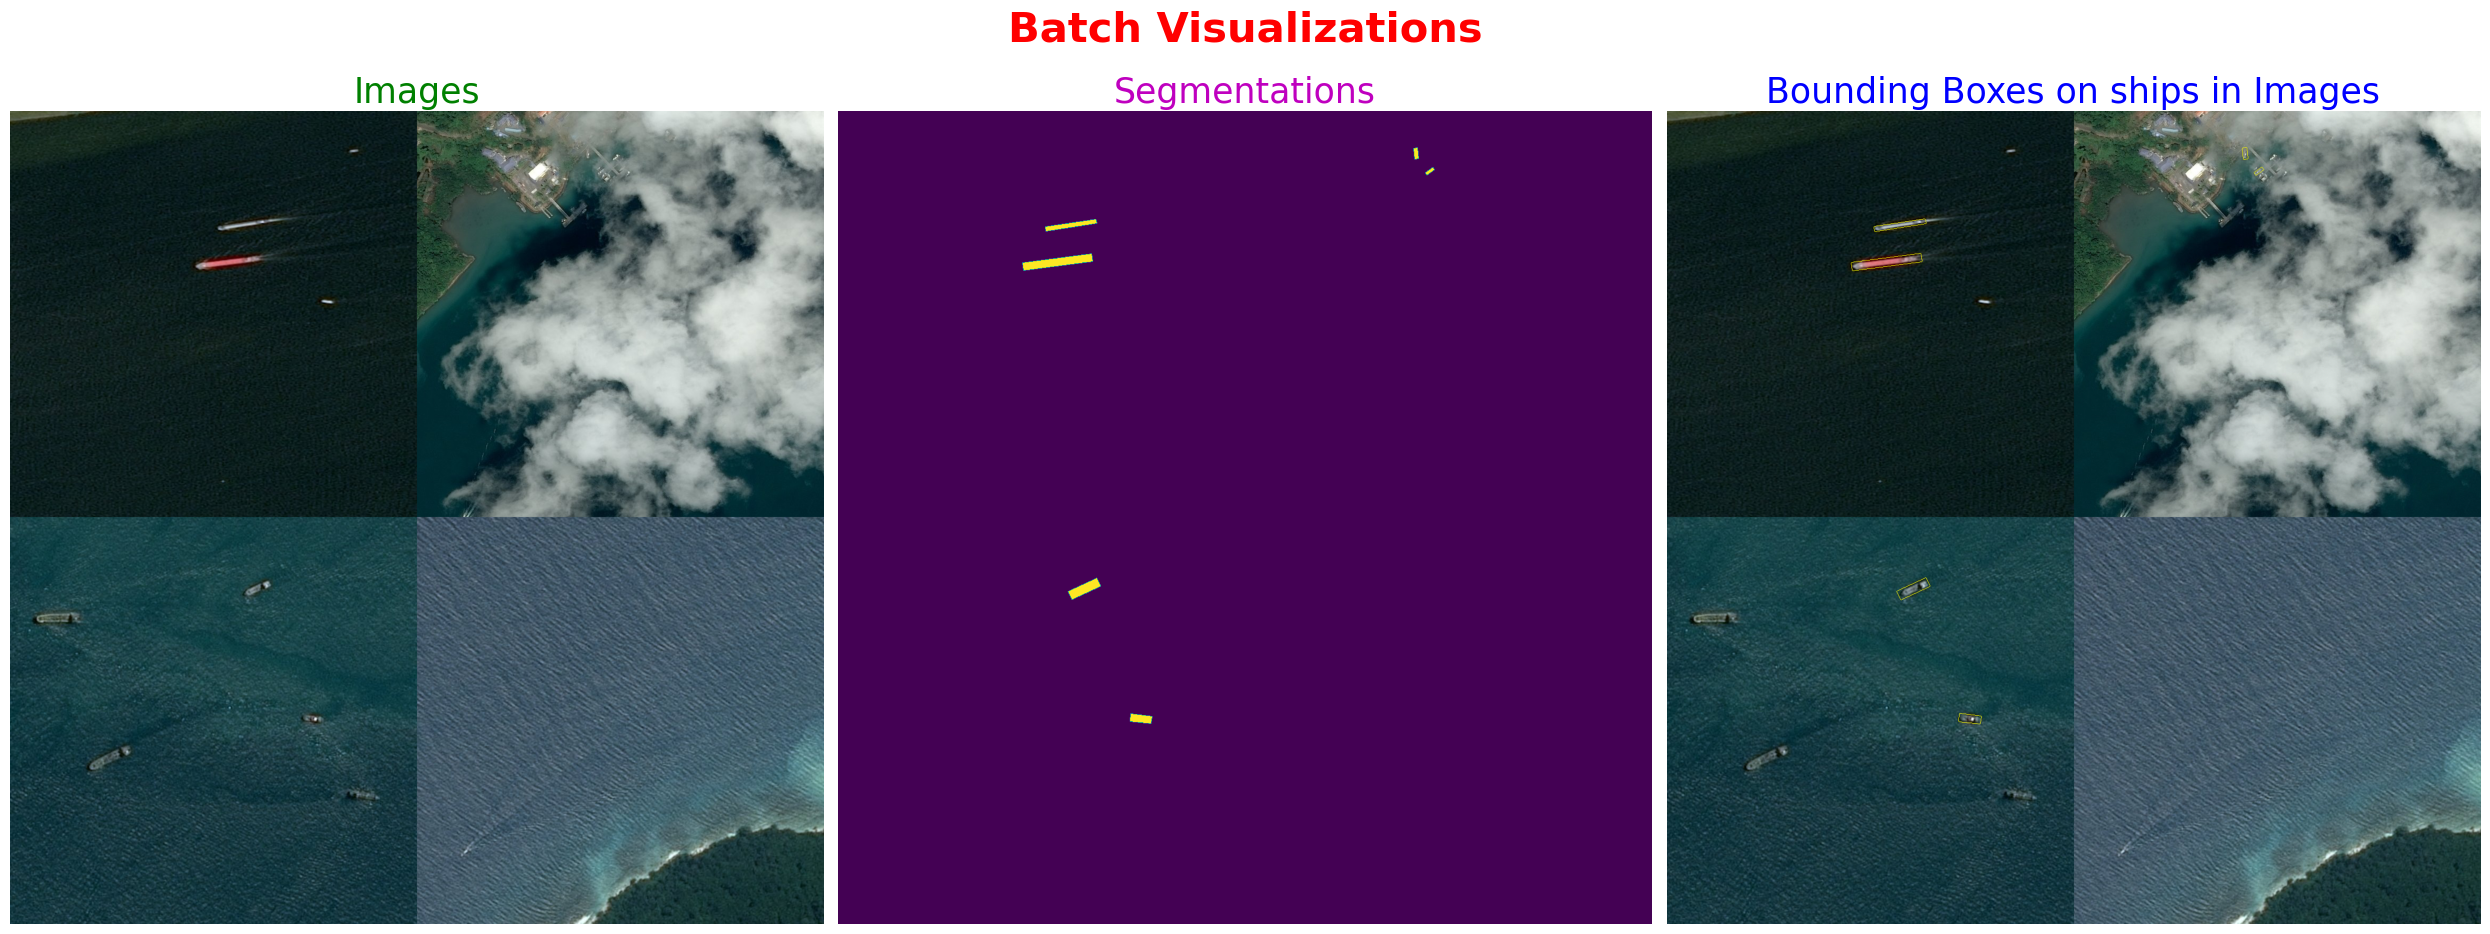

In [45]:
#Visulaising train batch
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)
batch_rgb = montage_rgb(train_x)  #Create montage of img
batch_seg = montage(train_y[:, :, :, 0])  #Create montage of msk
batch_overlap = mark_boundaries(batch_rgb, batch_seg.astype(int)) # Create bounding box around ships in img
titles = ["Images", "Segmentations", "Bounding Boxes on ships in Images"] # Titles for subplot
colors = ['g','m','b']#Colors to be used for title
display = [batch_rgb, batch_seg, batch_overlap] # What to display in subplot
plt.figure(figsize=(25,10))   # Generate figure
for i in range(3):      
    plt.subplot(1, 3, i+1)  #Create subplot
    plt.imshow(display[i]) #Display
    plt.title(titles[i], fontsize = 25, color = colors[i]) #Title
    plt.axis('off') #Turn off the axis
plt.suptitle("Batch Visualizations", fontsize=30, color='r', weight="bold") # Add suptitle
plt.tight_layout()  # Layout for subplot

In [46]:
#Prepare validation data
valid_x, valid_y = next(make_image_gen(valid_df, VALID_IMG_COUNT)) #The next() function returns the next item in an iterator.
print(f'valid_x :\n Shape={valid_x.shape}, Min value={valid_x.min()}, Max value={valid_x.max()}')
print(f'valid_y :\n Shape={valid_y.shape}, Min value={valid_y.min()}, Max value={valid_y.max()}')

valid_x :
 Shape=(400, 768, 768, 3), Min value=0.0, Max value=1.0
valid_y :
 Shape=(400, 768, 768, 1), Min value=0, Max value=1


In [47]:
#AUGMENTING DATA USING IMAGEDATAGENERATOR
from keras.preprocessing.image import ImageDataGenerator

#preparing image data genertor arguments
dg_args = dict(rotation_range = 15, #Degree range for random rotations
               horizontal_flip = True, #Randomly flips the inputs horizontally
               vertical_flip = True, #Randomly flips the inputs vertical
               data_format = 'channels_last') #Randomly channels_last flips refer the to (batch,height,width, channels)

In [48]:
image_gen = ImageDataGenerator(**dg_args)
label_gen = ImageDataGenerator(**dg_args)

def create_aug_gen(in_gen, seed = None):
    '''
    Takes in -
    in_gen: train data generator , seed value
    '''
    np.random.seed(seed if seed is not None else np.random.choice(range(9999))) #Randomly assign seed value if not provided
    for in_x, in_y in in_gen:  #For imgs and msks in train data generator
        seed = 12  #Seed value for imgs and msks must be same else augmentation won't be same
        
        #create augmented imgs
        g_x = image_gen.flow(255*in_x,     #Inverse scaling on imgs for augmentation
                             batch_size = in_x.shape[0], # batch_size=3
                             seed = seed,  #Seed
                             shuffle=True) #Shuffle the data
        #create augmented masks
        g_y = label_gen.flow(in_y, 
                             batch_size = in_x.shape[0], 
                             seed = seed, 
                             shuffle=True)
        '''yields - augmented scaled imgs and msks array'''
        yield next(g_x)/255.0, next(g_y)

In [49]:
#Augment the train data 
cur_gen = create_aug_gen(train_gen ,seed=42)
t_x, t_y = next(cur_gen)
print('x', t_x.shape, t_x.dtype, t_x.min(), t_x.max())
print('y', t_y.shape, t_y.dtype, t_y.min(), t_y.max())

x (4, 768, 768, 3) float32 0.0 1.0
y (4, 768, 768, 1) float32 0.0 1.0


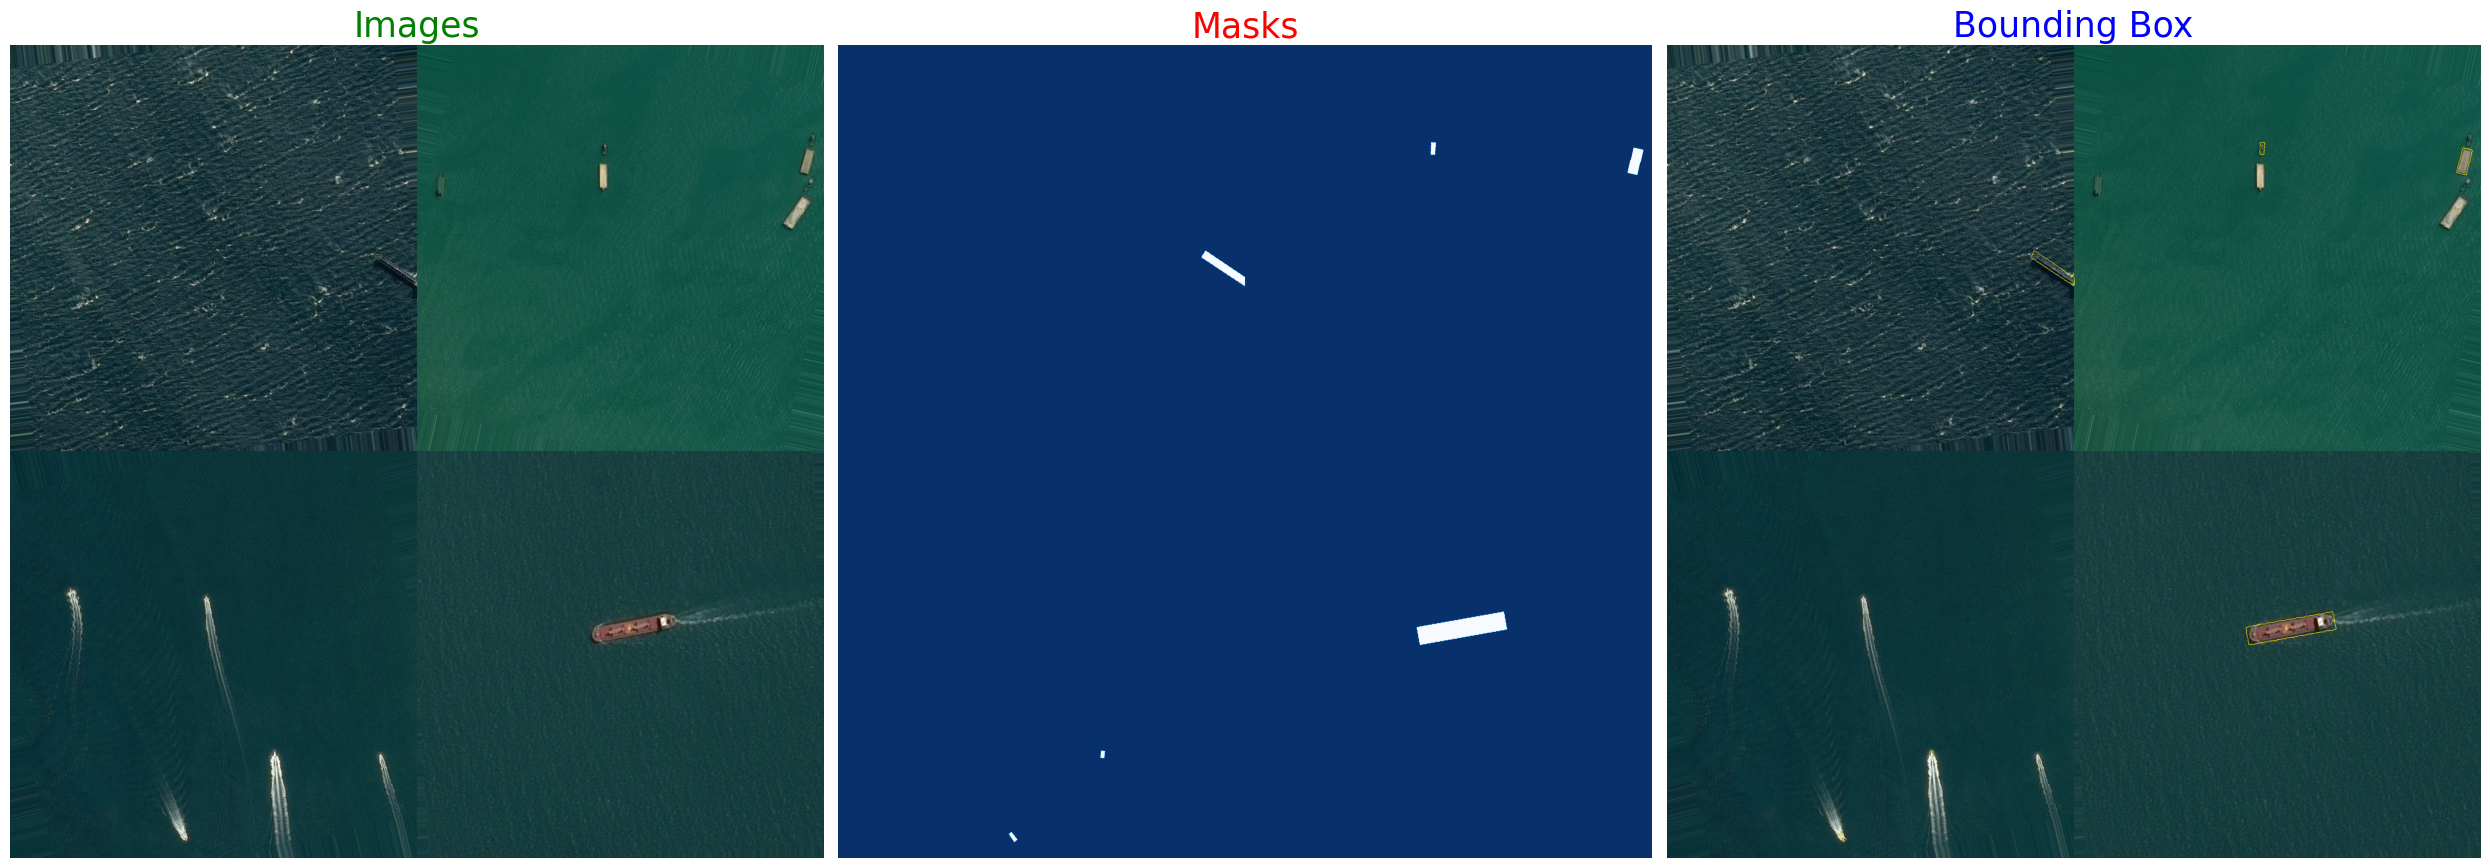

In [50]:
#final display before passing data into model
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (25, 10)) 
ax1.imshow(montage_rgb(t_x),cmap='gray')
ax1.set_title('Images',fontsize=25,color='g')
ax1.axis('off')
ax2.imshow(montage(t_y[:,:,:,0]),cmap='Blues_r')
ax2.set_title('Masks',fontsize=25,color='r')
ax2.axis('off')
ax3.imshow(mark_boundaries(montage_rgb(t_x),montage(t_y[:,:,:,0].astype(int))))
ax3.set_title('Bounding Box',fontsize=25,color='b')
ax3.axis('off')
plt.tight_layout()  

In [51]:
gc.collect()# block all the garbage That has been generated 

163

In [52]:
#Build U-net model
from keras import models, layers
#Conv2DTranspose upsampling
def upsample_conv(filters, kernel_size, strides, padding):
    return layers.Conv2DTranspose(filters, kernel_size, strides=strides, padding=padding)
#upsampling without Conv2DTranspose
def upsample_simple(filters, kernel_size, strides, padding):
    return layers.UpSampling2D(strides)

#upsampling method choice 
if UPSAMPLE_MODE=='DECONV':
    upsample=upsample_conv
else:
    upsample=upsample_simple
    
#Build the layers of UNET
input_img = layers.Input(t_x.shape[1:], name = 'RGB_Input')
pp_in_layer = input_img

#if NET_SCALING is defined then do the next step else continue a head
if NET_SCALING is not None:
    pp_in_layer = layers.AvgPool2D(NET_SCALING)(pp_in_layer)
    
#to avoid overfitting and fastening the process of traing 
pp_in_layer = layers.GaussianNoise(GAUSSIAN_NOISE)(pp_in_layer)  #useful to mitigate overfitting
pp_in_layer = layers.BatchNormalization()(pp_in_layer)#allows using higher learning rate without causing problems with gradients

c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (pp_in_layer)
c1 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c1)          #Going Down
p1 = layers.MaxPooling2D((2, 2)) (c1) #2x2 kernel

c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (p1)
c2 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c2)
p2 = layers.MaxPooling2D((2, 2)) (c2)

c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (p2)
c3 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c3)
p3 = layers.MaxPooling2D((2, 2)) (c3)

c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (p3)
c4 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c4)
p4 = layers.MaxPooling2D(pool_size=(2, 2)) (c4) 


c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same') (p4)       #Bottle Neck
c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same') (c5)

#upsample (U--> Concat -->C--->C)

u6 = upsample(64, (2, 2), strides=(2, 2), padding='same') (c5)                 #Going Up
u6 = layers.concatenate([u6, c4])
c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (u6)
c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same') (c6)

u7 = upsample(32, (2, 2), strides=(2, 2), padding='same') (c6)
u7 = layers.concatenate([u7, c3])
c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (u7)
c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same') (c7)

u8 = upsample(16, (2, 2), strides=(2, 2), padding='same') (c7)
u8 = layers.concatenate([u8, c2])
c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (u8)
c8 = layers.Conv2D(16, (3, 3), activation='relu', padding='same') (c8)

u9 = upsample(8, (2, 2), strides=(2, 2), padding='same') (c8)
u9 = layers.concatenate([u9, c1], axis=3)
c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (u9)
c9 = layers.Conv2D(8, (3, 3), activation='relu', padding='same') (c9)

d = layers.Conv2D(1, (1, 1), activation='sigmoid') (c9)
d = layers.Cropping2D((EDGE_CROP, EDGE_CROP))(d)
d = layers.ZeroPadding2D((EDGE_CROP, EDGE_CROP))(d)

if NET_SCALING is not None:
    d = layers.UpSampling2D(NET_SCALING)(d)

seg_model = models.Model(inputs=[input_img], outputs=[d])

seg_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 RGB_Input (InputLayer)         [(None, 768, 768, 3  0           []                               
                                )]                                                                
                                                                                                  
 gaussian_noise (GaussianNoise)  (None, 768, 768, 3)  0          ['RGB_Input[0][0]']              
                                                                                                  
 batch_normalization (BatchNorm  (None, 768, 768, 3)  12         ['gaussian_noise[0][0]']         
 alization)                                                                                       
                                                                                              

 conv2d_16 (Conv2D)             (None, 768, 768, 8)  1736        ['concatenate_3[0][0]']          
                                                                                                  
 conv2d_17 (Conv2D)             (None, 768, 768, 8)  584         ['conv2d_16[0][0]']              
                                                                                                  
 conv2d_18 (Conv2D)             (None, 768, 768, 1)  9           ['conv2d_17[0][0]']              
                                                                                                  
 cropping2d (Cropping2D)        (None, 736, 736, 1)  0           ['conv2d_18[0][0]']              
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 768, 768, 1)  0          ['cropping2d[0][0]']             
                                                                                                  
Total para

In [53]:
import tensorflow as tf
#compute dice coefficent ,loss with BCE and compile the model
import keras.backend as K
from keras.optimizers import Adam          
from keras.losses import binary_crossentropy
#dice coefficent

def dice_coef(y_true, y_pred, smooth=1):
    y_true = K.cast(y_true, dtype='float32')#add with chatgpt
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])  #int=y_true inter y_pred
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3]) #un=y_true_flattened union y_pred_flattened
    return K.mean( (2. * intersection + smooth) / (union + smooth), axis=0)#dice=2*int+1/un +1

#dice with BCE
def dice_p_bce(y_true, y_pred):
    combo_loss=1e-3*binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)
    return combo_loss

def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true)*K.flatten(K.round(y_pred)))/K.sum(y_true)

class DiceLoss(tf.keras.losses.Loss):
    def __init__(self, smooth=1e-6, gama=2):
        super(DiceLoss, self).__init__()
        self.name = 'NDL'
        self.smooth = smooth
        self.gama = gama

    def call(self, y_true, y_pred):
        y_true, y_pred = tf.cast(
            y_true, dtype=tf.float32), tf.cast(y_pred, tf.float32)
        nominator = 2 * \
            tf.reduce_sum(tf.multiply(y_pred, y_true)) + self.smooth
        denominator = tf.reduce_sum(
            y_pred ** self.gama) + tf.reduce_sum(y_true ** self.gama) + self.smooth
        result = 1 - tf.divide(nominator, denominator)
        return result
    
#compile the model
#seg_model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=dice_p_bce, metrics=[dice_coef])
seg_model.compile(optimizer=Adam(1e-4, decay=1e-6), loss=DiceLoss(), metrics=[dice_coef, 'binary_accuracy', true_positive_rate])


In [54]:
# Preparing Callbacks
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau

# Best model weights
weight_path="{}_weights.best.hdf5".format('seg_model')

#Monitor validation dice coeff and save the best model weights
checkpoint = ModelCheckpoint(weight_path, monitor='val_dice_coef', verbose=1, 
                             save_best_only=True, mode='max', save_weights_only = True)

# Reduce Learning Rate on Plateau
reduceLROnPlat = ReduceLROnPlateau(monitor='val_dice_coef', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='max', min_delta=0.0001, cooldown=2, min_lr=1e-6)

# Stop training once there is no improvement seen in the model
early = EarlyStopping(monitor="val_dice_coef", 
                      mode="max", 
                      patience=15) # probably needs to be more patient

#Callbacks ready
callbacks_list = [checkpoint, early, reduceLROnPlat]

In [ ]:
#Finalizing steps per epoch
step_count = min(MAX_TRAIN_STEPS, balanced_train_df.shape[0]//BATCH_SIZE)

#final augmented data being used in training
aug_gen = create_aug_gen(make_image_gen(balanced_train_df))

#save loss history while training
loss_history = [seg_model.fit(aug_gen, 
                             steps_per_epoch=step_count, 
                             epochs=NB_EPOCHS, 
                             validation_data=(valid_x, valid_y),
                             callbacks=callbacks_list,
                             workers=1 # the generator is not very thread safe
                                       )]

Epoch 1/100
 16/200 [=>............................] - ETA: 10:23 - loss: 0.9838 - dice_coef: 0.0080 - binary_accuracy: 0.6078 - true_positive_rate: 0.3438

In [55]:
#Save the weights to load it later for test data
seg_model.load_weights(weight_path)
seg_model.save('C:\\Users\\hp\\Desktop\\MINI-PROJECT\\code\\seg_model.h5')

In [56]:
from keras.models import load_model
from tensorflow.keras.utils import get_custom_objects

def dice_coef(y_true, y_pred, smooth=1):
    y_true = K.cast(y_true, dtype='float32')
    intersection = K.sum(y_true * y_pred, axis=[1,2,3])
    union = K.sum(y_true, axis=[1,2,3]) + K.sum(y_pred, axis=[1,2,3])
    return K.mean((2. * intersection + smooth) / (union + smooth), axis=0)

def dice_p_bce(y_true, y_pred):
    combo_loss = 1e-3 * binary_crossentropy(y_true, y_pred) - dice_coef(y_true, y_pred)
    return combo_loss

def true_positive_rate(y_true, y_pred):
    return K.sum(K.flatten(y_true) * K.flatten(K.round(y_pred))) / K.sum(y_true)

class DiceLoss(tf.keras.losses.Loss):
    def __init__(self, smooth=1e-6, gama=2, **kwargs):
        super(DiceLoss, self).__init__(**kwargs)
        self.name = 'NDL'
        self.smooth = smooth
        self.gama = gama

    def call(self, y_true, y_pred):
        y_true, y_pred = tf.cast(y_true, dtype=tf.float32), tf.cast(y_pred, tf.float32)
        nominator = 2 * tf.reduce_sum(tf.multiply(y_pred, y_true)) + self.smooth
        denominator = tf.reduce_sum(y_pred ** self.gama) + tf.reduce_sum(y_true ** self.gama) + self.smooth
        result = 1 - tf.divide(nominator, denominator)
        return result

get_custom_objects()['dice_p_bce'] = dice_p_bce
get_custom_objects()['dice_coef'] = dice_coef
get_custom_objects()['true_positive_rate'] = true_positive_rate
get_custom_objects()['DiceLoss'] = DiceLoss

segnet_model = load_model("C:\\Users\\hp\\Desktop\\MINI-PROJECT\\code\\seg_model.h5")


In [57]:
#PLOTTING RESULTS
def show_loss(loss_history):
    epich = np.cumsum(np.concatenate(
        [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(22, 10))
    _ = ax1.plot(epich,
                 np.concatenate([mh.history['loss'] for mh in loss_history]),
                 'b-',
                 epich, np.concatenate(
            [mh.history['val_loss'] for mh in loss_history]), 'r-')
    ax1.legend(['Training', 'Validation'])
    ax1.set_title('Loss')

    _ = ax2.plot(epich, np.concatenate(
        [mh.history['true_positive_rate'] for mh in loss_history]), 'b-',
                     epich, np.concatenate(
            [mh.history['val_true_positive_rate'] for mh in loss_history]),
                     'r-')
    ax2.legend(['Training', 'Validation'])
    ax2.set_title('True Positive Rate\n(Positive Accuracy)')
    
    _ = ax3.plot(epich, np.concatenate(
        [mh.history['binary_accuracy'] for mh in loss_history]), 'b-',
                     epich, np.concatenate(
            [mh.history['val_binary_accuracy'] for mh in loss_history]),
                     'r-')
    ax3.legend(['Training', 'Validation'])
    ax3.set_title('Binary Accuracy (%)')
    
    _ = ax4.plot(epich, np.concatenate(
        [mh.history['dice_coef'] for mh in loss_history]), 'b-',
                     epich, np.concatenate(
            [mh.history['val_dice_coef'] for mh in loss_history]),
                     'r-')
    ax4.legend(['Training', 'Validation'])
    ax4.set_title('DICE')

show_loss(loss_history)

NameError: name 'loss_history' is not defined

In [ ]:
#VIZUALISE PREDICTIONS AND EVALUATE RESULTS
pred_y = seg_model.predict(valid_x)
print(pred_y.shape, pred_y.min(), pred_y.max(), pred_y.mean())

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (5, 5))
ax.hist(pred_y.ravel(), np.linspace(0, 1, 10))
ax.set_xlim(0, 1)
ax.set_yscale('log')
plt.show()

In [ ]:
#PREPARE FULL RESOLUTION MODEL
if IMG_SCALING is not None:
    fullres_model = models.Sequential()
    fullres_model.add(layers.AvgPool2D(IMG_SCALING, input_shape = (None, None, 3)))
    fullres_model.add(seg_model)
    fullres_model.add(layers.UpSampling2D(IMG_SCALING))
else:
    fullres_model = seg_model
fullres_model.save('fullres_model.h5')

In [ ]:
#RUN THE TEST DATA
test_paths = os.listdir(test_image_dir)
print(len(test_paths), 'test images found')

In [ ]:
fig, m_axs = plt.subplots(20, 2, figsize = (10, 40))
[c_ax.axis('off') for c_ax in m_axs.flatten()]
for (ax1, ax2), c_img_name in zip(m_axs, test_paths):
    c_path = os.path.join(test_image_dir, c_img_name)
    c_img = imread(c_path)
    first_img = np.expand_dims(c_img, 0)/255.0
    first_seg = fullres_model.predict(first_img)
    ax1.imshow(first_img[0])
    ax1.set_title('Image')
    ax2.imshow(first_seg[0, :, :, 0], vmin = 0, vmax = 1)
    ax2.set_title('Prediction')
fig.savefig('test_predictions.png')

In [ ]:
from tqdm import tqdm
from skimage.io import imread
from skimage.morphology import binary_opening, disk
out_pred_rows = []
for c_img_name in tqdm(test_paths):
    c_path = os.path.join(test_image_dir, c_img_name)
    c_img = imread(c_path)
    c_img = np.expand_dims(c_img, 0)/255.0
    cur_seg = fullres_model.predict(c_img)[0]
    cur_seg = binary_opening(cur_seg>0.5, np.expand_dims(disk(2), -1))
    cur_rles = multi_rle_encode(cur_seg)
    if len(cur_rles) > 0:
        for c_rle in cur_rles:
            out_pred_rows += [{'ImageId': c_img_name, 'EncodedPixels': c_rle}]
    else:
        out_pred_rows += [{'ImageId': c_img_name, 'EncodedPixels': None}]
    gc.collect()
submission_df = pd.DataFrame(out_pred_rows)[['ImageId', 'EncodedPixels']]
submission_df.to_csv('submission.csv', index=False)
submission_df.sample(3)


In [ ]:
#CREATE SUBMISSION
from tqdm import tqdm
from skimage.morphology import binary_opening, disk
out_pred_rows = []
for c_img_name in ['00c3db267.jpg','00e90efc3.jpg','1b5fd69bc.jpg','1db99c681.jpg','00dc34840.jpg']:
    c_path = os.path.join(test_image_dir, c_img_name)
    c_img = imread(c_path)
    c_img = np.expand_dims(c_img, 0)/255.0
    cur_seg = fullres_model.predict(c_img)[0]
    cur_seg = binary_opening(cur_seg>0.5, np.expand_dims(disk(2), -1))
    cur_rles = multi_rle_encode(cur_seg)
    if len(cur_rles)>0:
        for c_rle in cur_rles:
            out_pred_rows += [{'ImageId': c_img_name, 'EncodedPixels': c_rle}]
    else:
        out_pred_rows += [{'ImageId': c_img_name, 'EncodedPixels': None}]
    gc.collect()
submission_df = pd.DataFrame(out_pred_rows)[['ImageId', 'EncodedPixels']]
submission_df.to_csv('submission.csv', index=False)
submission_df.sample(4)

In [ ]:
rle_0 = submission_df.query('ImageId=="00dc34840.jpg"')['EncodedPixels']
img_0 = masks_as_image(rle_0)
original=imread(test_image_dir + "/" + '00dc34840.jpg')
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(f"Original - Train Image {original.shape}")
plt.imshow(original)
plt.subplot(1, 2, 2)
plt.title(f"Mask generated from the RLE data for each ship {final.shape}")
plt.imshow(img_0, cmap = "Blues_r")
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import numpy as np

def frame_ships(image, mask):
    # Check the number of channels in the mask image
    if mask.ndim == 2 or (mask.ndim == 3 and mask.shape[2] == 1):
        mask_gray = mask.astype(np.uint8)
    elif mask.ndim == 3:  # Multi-channel mask
        mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    else:
        raise ValueError("Invalid number of channels in the mask image.")

    # Find contours in the mask image
    contours, _ = cv2.findContours(mask_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate through each contour
    for contour in contours:
        # Calculate the bounding rectangle for the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Draw a rectangle around the ship on the original image
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

    return image


In [ ]:
# Read the ship image and the mask image
ship_image = cv2.imread(test_image_dir + "/" + '00dc34840.jpg')
mask_image = masks_as_image(rle_0)

# Call the function to frame the ships based on the mask
result_image = frame_ships(ship_image, mask_image)

# Display the resulting image
Image.fromarray(result_image).show()

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import cv2

test_path = "C:\\Users\\hp\\Desktop\\MINI-PROJECT\\code\\test_image.png"

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.axis('off')
ax2.axis('off')

# Load and resize the image
c_img = Image.open(test_path)
c_img = c_img.resize((768, 768))
c_img = np.array(c_img)
first_img = np.expand_dims(c_img, 0) / 255.0

first_seg = segnet_model.predict(first_img)

ax1.imshow(c_img)
ax1.set_title('Image')

ax2.imshow(first_seg[0, :, :, 0], vmin=0, vmax=1)
ax2.set_title('Prediction')

plt.show()